In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

# Visualization settings
plt.style.use("default")
sns.set_theme(style="whitegrid")

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:.4f}")

print("Environment setup complete.")


Environment setup complete.


In [2]:
# loading the dataset

trades_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

print("Trades dataset shape:", trades_df.shape)
print("Sentiment dataset shape:", sentiment_df.shape)

trades_df.head()

Trades dataset shape: (211224, 16)
Sentiment dataset shape: (2644, 4)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.8700,7872.1600,BUY,02-12-2024 22:50,0.0000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.3454,895000000000000.0000,1730000000000.0000
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.0000,127.6800,BUY,02-12-2024 22:50,986.5246,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0056,443000000000000.0000,1730000000000.0000
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.0900,1150.6300,BUY,02-12-2024 22:50,1002.5190,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0504,660000000000000.0000,1730000000000.0000
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.9800,1142.0400,BUY,02-12-2024 22:50,1146.5586,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0500,1080000000000000.0000,1730000000000.0000
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.7300,69.7500,BUY,02-12-2024 22:50,1289.4885,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0031,1050000000000000.0000,1730000000000.0000


In [3]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
print("Trades Data Info:")
trades_df.info()

print("\nSentiment Data Info:")
sentiment_df.info()


Trades Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes:

In [5]:
# Basic statistics
trades_df.describe(include="all")

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
count,211224,211224,211224.0000,211224.0000,211224.0000,211224,211224,211224.0000,211224,211224.0000,211224,211224.0000,211224,211224.0000,211224.0000,211224.0000
unique,32,246,NaN,NaN,NaN,2,27977,NaN,12,NaN,101184,NaN,2,NaN,NaN,NaN
top,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,NaN,NaN,NaN,SELL,14-02-2025 00:31,NaN,Open Long,NaN,0x00000000000000000000000000000000000000000000...,NaN,True,NaN,NaN,NaN
freq,40184,68005,NaN,NaN,NaN,108528,441,NaN,49895,NaN,9032,NaN,128403,NaN,NaN,NaN
mean,NaN,NaN,11414.7233,4623.3650,5639.4512,NaN,NaN,-29946.2488,NaN,48.7490,NaN,69653876008.9702,NaN,1.1640,562854854500788.5000,1737744290421.5430
std,NaN,NaN,29447.6549,104272.8895,36575.1385,NaN,NaN,673807.4237,NaN,919.1648,NaN,18357525271.9257,NaN,6.7589,325756470346523.3750,8689920301.5900
min,NaN,NaN,0.0000,0.0000,0.0000,NaN,NaN,-14334629.0000,NaN,-117990.1041,NaN,173271100.0000,NaN,-1.1757,0.0000,1680000000000.0000
25%,NaN,NaN,4.8547,2.9400,193.7900,NaN,NaN,-376.2311,NaN,0.0000,NaN,59838527992.7500,NaN,0.0161,281000000000000.0000,1740000000000.0000
50%,NaN,NaN,18.2800,32.0000,597.0450,NaN,NaN,84.7279,NaN,0.0000,NaN,74429390066.0000,NaN,0.0896,562000000000000.0000,1740000000000.0000
75%,NaN,NaN,101.5800,187.9025,2058.9600,NaN,NaN,9337.2775,NaN,5.7928,NaN,83355430544.0000,NaN,0.3938,846000000000000.0000,1740000000000.0000


In [7]:
print(trades_df.columns.tolist())

['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


In [9]:
# Check which timestamp column to use
if "Timestamp IST" in trades_df.columns:
    time_col = "Timestamp IST"
elif "Timestamp" in trades_df.columns:
    time_col = "Timestamp"
else:
    raise ValueError("No valid timestamp column found.")

print(f"Using '{time_col}' as trade time column")

# Parse datetime
trades_df[time_col] = pd.to_datetime(trades_df[time_col], errors="coerce")

# Create date column for sentiment merge
trades_df["trade_date"] = trades_df[time_col].dt.date

trades_df[["trade_date"]].head()


Using 'Timestamp IST' as trade time column


,trade_date
0,2024-02-12
1,2024-02-12
2,2024-02-12
3,2024-02-12
4,2024-02-12


In [13]:
# Parse date column
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"], errors="coerce")

# Create trade_date for merge
sentiment_df["trade_date"] = sentiment_df["date"].dt.date

# Standardize classification column name
sentiment_df.rename(columns={"classification": "Classification"}, inplace=True)

# Quick check
sentiment_df[["trade_date", "Classification", "value"]].head()


,trade_date,Classification,value
0,2018-02-01,Fear,30
1,2018-02-02,Extreme Fear,15
2,2018-02-03,Fear,40
3,2018-02-04,Extreme Fear,24
4,2018-02-05,Extreme Fear,11


In [14]:
sentiment_df["Classification"] = sentiment_df["Classification"].replace({
    "Extreme Fear": "Fear",
    "Extreme Greed": "Greed"
})

sentiment_df["Classification"].value_counts()


,count
Classification,
Fear,1289
Greed,959
Neutral,396


In [15]:
# Merge Trades with Market Sentiment

merged_df = trades_df.merge(
    sentiment_df[["trade_date", "Classification", "value"]],
    on="trade_date",
    how="left"
)

print("Merged dataset shape:", merged_df.shape)
merged_df.head()


Merged dataset shape: (211224, 19)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,Classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.8700,7872.1600,BUY,2024-02-12 22:50:00,0.0000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.3454,895000000000000.0000,1730000000000.0000,2024-02-12,Greed,70.0000
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.0000,127.6800,BUY,2024-02-12 22:50:00,986.5246,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0056,443000000000000.0000,1730000000000.0000,2024-02-12,Greed,70.0000
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.0900,1150.6300,BUY,2024-02-12 22:50:00,1002.5190,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0504,660000000000000.0000,1730000000000.0000,2024-02-12,Greed,70.0000
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.9800,1142.0400,BUY,2024-02-12 22:50:00,1146.5586,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0500,1080000000000000.0000,1730000000000.0000,2024-02-12,Greed,70.0000
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.7300,69.7500,BUY,2024-02-12 22:50:00,1289.4885,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0031,1050000000000000.0000,1730000000000.0000,2024-02-12,Greed,70.0000


In [16]:
# Final Sentiment Check

print("Sentiment distribution in merged data:")
print(merged_df["Classification"].value_counts(dropna=False))

print("\nMissing sentiment percentage:")
print(round(merged_df["Classification"].isna().mean() * 100, 2), "%")


Sentiment distribution in merged data:
Classification
NaN        175360
Greed       16913
Fear        16195
Neutral      2756
Name: count, dtype: int64

Missing sentiment percentage:
83.02 %


In [17]:
# Create Analysis Subset (Sentiment-Aligned Trades)

analysis_df = merged_df.dropna(subset=["Classification"]).copy()

print("Analysis dataset shape:", analysis_df.shape)
analysis_df["Classification"].value_counts()


Analysis dataset shape: (35864, 19)


,count
Classification,
Greed,16913
Fear,16195
Neutral,2756


In [18]:
# Resolve Neutral Sentiment Using Index Value

analysis_df["Classification"] = np.where(
    analysis_df["Classification"] == "Neutral",
    np.where(analysis_df["value"] >= 50, "Greed", "Fear"),
    analysis_df["Classification"]
)

analysis_df["Classification"].value_counts()


,count
Classification,
Fear,18094
Greed,17770


In [19]:
# Data Coverage Summary

total_trades = len(merged_df)
usable_trades = len(analysis_df)

print(f"Total trades: {total_trades}")
print(f"Trades with sentiment data: {usable_trades}")
print(f"Coverage: {round(usable_trades / total_trades * 100, 2)} %")


Total trades: 211224
Trades with sentiment data: 35864
Coverage: 16.98 %


In [20]:
# Standardize Column Names

analysis_df.columns = (
    analysis_df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

analysis_df.columns.tolist()


['account',
 'coin',
 'execution_price',
 'size_tokens',
 'size_usd',
 'side',
 'timestamp_ist',
 'start_position',
 'direction',
 'closed_pnl',
 'transaction_hash',
 'order_id',
 'crossed',
 'fee',
 'trade_id',
 'timestamp',
 'trade_date',
 'classification',
 'value']

In [23]:
# Core Performance Metrics

# Absolute PnL
analysis_df["abs_pnl"] = analysis_df["closed_pnl"].abs()

# PnL normalized by USD exposure
analysis_df["pnl_per_usd"] = analysis_df["closed_pnl"] / analysis_df["size_usd"]

# Binary win indicator
analysis_df["is_win"] = (analysis_df["closed_pnl"] > 0).astype(int)

analysis_df[[
    "closed_pnl",
    "size_usd",
    "abs_pnl",
    "pnl_per_usd",
    "is_win"
]].head()


,closed_pnl,size_usd,abs_pnl,pnl_per_usd,is_win
0,0.0000,7872.1600,0.0000,0.0000,0
1,0.0000,127.6800,0.0000,0.0000,0
2,0.0000,1150.6300,0.0000,0.0000,0
3,0.0000,1142.0400,0.0000,0.0000,0
4,0.0000,69.7500,0.0000,0.0000,0


In [24]:
# Risk Proxy Features

# Log-scaled exposure (stability + risk proxy)
analysis_df["log_size_usd"] = np.log1p(analysis_df["size_usd"])

# PnL volatility proxy (absolute normalized PnL)
analysis_df["normalized_risk"] = analysis_df["abs_pnl"] / analysis_df["size_usd"]

analysis_df[[
    "size_usd",
    "log_size_usd",
    "normalized_risk"
]].describe()


,size_usd,log_size_usd,normalized_risk
count,35864.0000,35864.0000,35851.0000
mean,4920.3591,6.4570,0.0516
std,22033.1386,2.0408,0.1624
min,0.0000,0.0000,0.0000
25%,166.5300,5.1212,0.0000
50%,597.9050,6.3951,0.0000
75%,2220.2425,7.7058,0.0328
max,1190250.0000,13.9897,3.1009


In [25]:
# Directional Behavior

analysis_df["side"] = analysis_df["side"].str.lower()

analysis_df["is_long"] = (analysis_df["side"] == "buy").astype(int)
analysis_df["is_short"] = (analysis_df["side"] == "sell").astype(int)

analysis_df[[
    "side",
    "direction",
    "is_long",
    "is_short"
]].head()


,side,direction,is_long,is_short
0,buy,Buy,1,0
1,buy,Buy,1,0
2,buy,Buy,1,0
3,buy,Buy,1,0
4,buy,Buy,1,0


In [26]:
# Aggregate Performance by Sentiment

sentiment_summary = analysis_df.groupby("classification").agg(
    total_trades=("trade_id", "count"),
    avg_pnl=("closed_pnl", "mean"),
    median_pnl=("closed_pnl", "median"),
    win_rate=("is_win", "mean"),
    avg_pnl_per_usd=("pnl_per_usd", "mean"),
    avg_trade_size=("size_usd", "mean"),
    avg_risk=("normalized_risk", "mean")
).reset_index()

sentiment_summary


,classification,total_trades,avg_pnl,median_pnl,win_rate,avg_pnl_per_usd,avg_trade_size,avg_risk
0,Fear,18094,101.9467,0.0000,0.3914,0.0264,5165.6704,0.0322
1,Greed,17770,100.1792,0.0000,0.4664,0.0626,4670.5750,0.0714


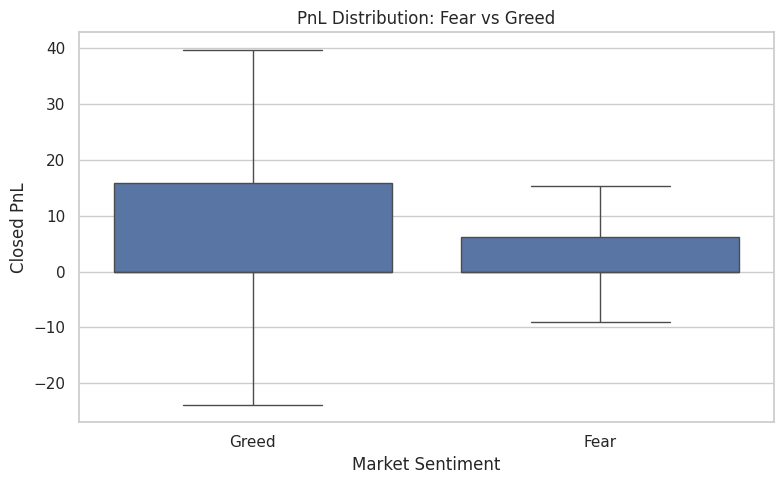

In [27]:
# PnL Distribution by Sentiment

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=analysis_df,
    x="classification",
    y="closed_pnl",
    showfliers=False
)
plt.title("PnL Distribution: Fear vs Greed")
plt.ylabel("Closed PnL")
plt.xlabel("Market Sentiment")
plt.tight_layout()
plt.show()


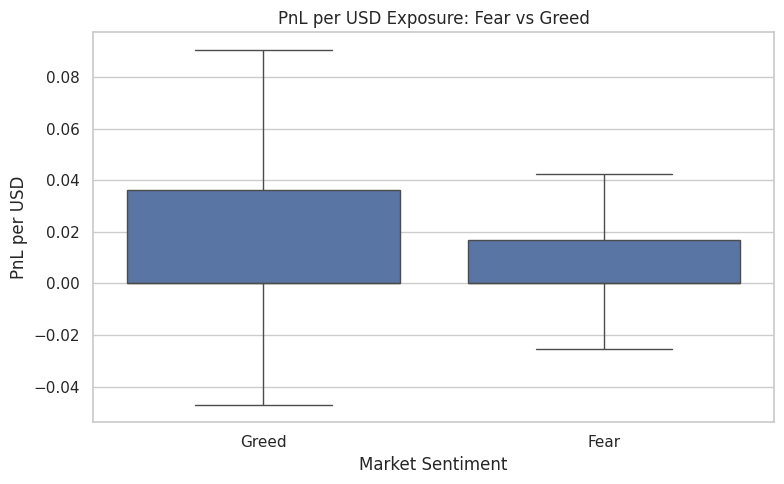

In [28]:
# Normalized Returns Comparison

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=analysis_df,
    x="classification",
    y="pnl_per_usd",
    showfliers=False
)
plt.title("PnL per USD Exposure: Fear vs Greed")
plt.ylabel("PnL per USD")
plt.xlabel("Market Sentiment")
plt.tight_layout()
plt.show()


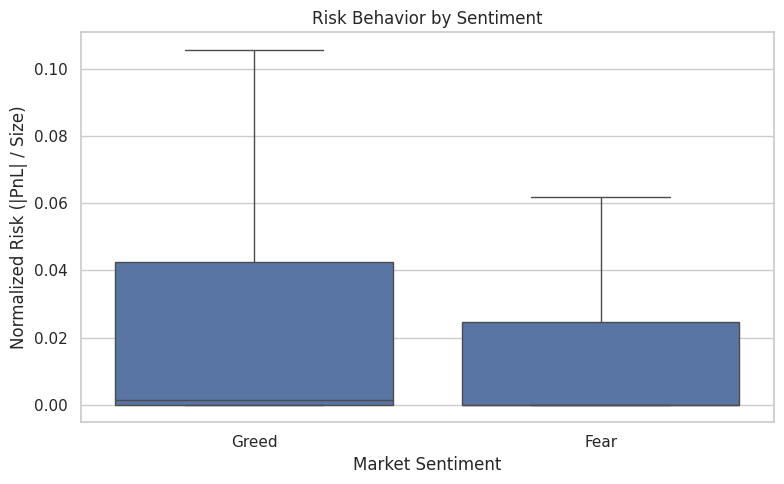

In [29]:
# Risk Proxy Comparison

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=analysis_df,
    x="classification",
    y="normalized_risk",
    showfliers=False
)
plt.title("Risk Behavior by Sentiment")
plt.ylabel("Normalized Risk (|PnL| / Size)")
plt.xlabel("Market Sentiment")
plt.tight_layout()
plt.show()


In [30]:
# Directional Bias by Sentiment

direction_summary = analysis_df.groupby(["classification", "side"]).agg(
    trades=("trade_id", "count"),
    avg_pnl=("closed_pnl", "mean"),
    win_rate=("is_win", "mean")
).reset_index()

direction_summary


,classification,side,trades,avg_pnl,win_rate
0,Fear,buy,9171,168.8633,0.3038
1,Fear,sell,8923,33.1704,0.4815
2,Greed,buy,7392,13.2019,0.2996
3,Greed,sell,10378,162.1310,0.5852


In [31]:
# Trader-Level Aggregation

trader_perf = analysis_df.groupby("account").agg(
    total_trades=("trade_id", "count"),
    total_pnl=("closed_pnl", "sum"),
    avg_pnl=("closed_pnl", "mean"),
    win_rate=("is_win", "mean"),
    avg_pnl_per_usd=("pnl_per_usd", "mean")
).reset_index()

# Filter out very low-activity traders (noise)
trader_perf = trader_perf[trader_perf["total_trades"] >= 10]

trader_perf.describe()


,total_trades,total_pnl,avg_pnl,win_rate,avg_pnl_per_usd
count,30.0000,30.0000,30.0000,30.0000,30.0000
mean,1195.1333,120819.9884,89.6216,0.3803,0.0477
std,1503.9682,312940.4585,143.3469,0.1747,0.0678
min,14.0000,-4320.3151,-14.5465,0.0000,-0.0000
25%,179.5000,2085.8751,12.5258,0.2831,0.0044
50%,408.5000,17995.3152,46.3928,0.3745,0.0242
75%,2180.2500,55176.1547,104.4424,0.4756,0.0449
max,5715.0000,1478494.6911,697.1552,0.8097,0.2563


In [32]:
# Top vs Bottom Traders

top_traders = trader_perf[trader_perf["total_pnl"] >= trader_perf["total_pnl"].quantile(0.9)]
bottom_traders = trader_perf[trader_perf["total_pnl"] <= trader_perf["total_pnl"].quantile(0.1)]

print("Top traders:", top_traders.shape[0])
print("Bottom traders:", bottom_traders.shape[0])


Top traders: 3
Bottom traders: 3


In [33]:
# Label Trades by Trader Skill

analysis_df["trader_group"] = np.where(
    analysis_df["account"].isin(top_traders["account"]),
    "Top",
    np.where(
        analysis_df["account"].isin(bottom_traders["account"]),
        "Bottom",
        "Middle"
    )
)

analysis_df["trader_group"].value_counts()


,count
trader_group,
Middle,19186
Top,13421
Bottom,3257


In [34]:
# Skill vs Sentiment Matrix

skill_sentiment = analysis_df.groupby(
    ["trader_group", "classification"]
).agg(
    avg_pnl=("closed_pnl", "mean"),
    win_rate=("is_win", "mean"),
    avg_pnl_per_usd=("pnl_per_usd", "mean")
).reset_index()

skill_sentiment


,trader_group,classification,avg_pnl,win_rate,avg_pnl_per_usd
0,Bottom,Fear,4.6930,0.2796,0.0049
1,Bottom,Greed,-8.7860,0.3325,0.0001
2,Middle,Fear,68.1041,0.4175,0.0328
3,Middle,Greed,35.2062,0.4675,0.0380
4,Top,Fear,167.7257,0.3825,0.0228
5,Top,Greed,231.4956,0.5000,0.1178


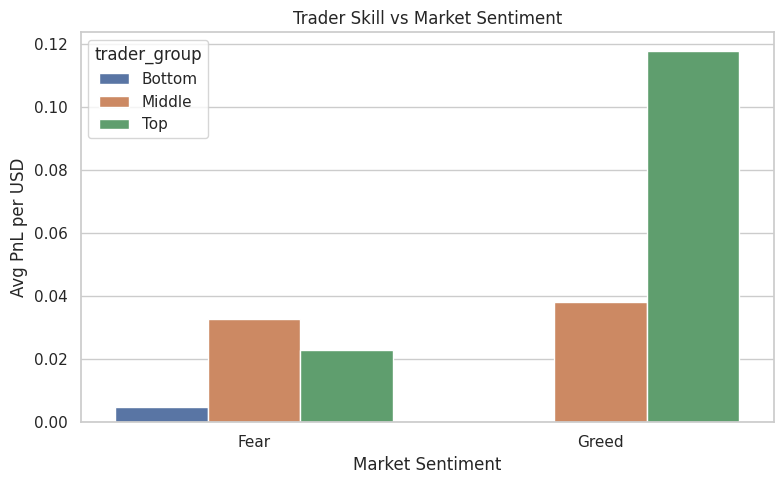

In [35]:
# Skill Robustness Plot

plt.figure(figsize=(8, 5))
sns.barplot(
    data=skill_sentiment,
    x="classification",
    y="avg_pnl_per_usd",
    hue="trader_group"
)
plt.title("Trader Skill vs Market Sentiment")
plt.ylabel("Avg PnL per USD")
plt.xlabel("Market Sentiment")
plt.tight_layout()
plt.show()


In [36]:
# Contrarian Behavior Analysis

analysis_df["contrarian"] = np.where(
    ((analysis_df["classification"] == "Fear") & (analysis_df["is_long"] == 1)) |
    ((analysis_df["classification"] == "Greed") & (analysis_df["is_short"] == 1)),
    1,
    0
)

analysis_df.groupby("contrarian").agg(
    avg_pnl=("closed_pnl", "mean"),
    win_rate=("is_win", "mean"),
    avg_pnl_per_usd=("pnl_per_usd", "mean")
)


,avg_pnl,win_rate,avg_pnl_per_usd
contrarian,,,
0,24.1230,0.3991,0.0147
1,165.2893,0.4532,0.0690


In [38]:
# Save Figures

import os
os.makedirs("outputs", exist_ok=True)

plt.figure(figsize=(8, 5))
sns.boxplot(data=analysis_df, x="classification", y="pnl_per_usd", showfliers=False)
plt.title("PnL per USD: Fear vs Greed")
plt.tight_layout()
plt.savefig("outputs/pnl_per_usd_fear_vs_greed.png", dpi=300)
plt.close()
